# url: https://toukei-lab.com/abc-analysis

# データ作成

In [1]:
import string
import random

# seed値を固定
random.seed(42)

def generate_product_name(length=4):
    alphabet_letters = string.ascii_letters
    uppercase_letters = ''.join(letter for letter in alphabet_letters if letter.isupper())
    return ''.join(random.choice(uppercase_letters) for letter in range(length))

# 100個の商品名を生成
product_names = [generate_product_name() for _ in range(100)]

In [2]:
# import string
# import random

# def generate_product_name(length=6):
#     characters = string.ascii_letters + string.digits
#     return ''.join(random.choice(characters) for character in range(length))

# # 100個の商品名を生成
# product_names = [generate_product_name() for character in range(100)]

# # 生成した商品名を表示
# for i, name in enumerate(product_names, start=1):
#     print(f"Product {i}: {name}")

# # このコードは、指定された長さのランダムな英字と数字の組み合わせからなる商品名を生成し、その生成された商品名をリストに格納して表示するものです。以下に各部分の説明を示します：
# # generate_product_name 関数：指定された長さ（デフォルトは6）のランダムな英字と数字の組み合わせからなる文字列を生成する関数です。string.ascii_letters はアルファベット（大文字と小文字の両方）を、string.digits は数字を表します。
# # random.choice を使用してランダムな文字を選択し、for ループで指定された長さ分の文字列を生成します。
# # product_names リスト：generate_product_name() を100回呼び出して生成された商品名を格納するためのリストです。リスト内包表記を使用して簡潔に書かれています。

# # リスト内の商品名を enumerate を使用してループし、f-string を使って商品名を表示しています。enumerate はインデックスとリストの要素を同時に取得するための便利な関数です。
# # 最終的に、100個の商品名が生成され、それぞれが "Product 1: [商品名]", "Product 2: [商品名]", ... といった形で表示されます。ランダムに生成された商品名がリストに格納され、それが表示されていることが確認できます。


In [3]:
import random
import pandas as pd

# 商品名のリストをDataFrameに変換
df_product_names_reset = pd.DataFrame(product_names, columns=['product names']).reset_index(drop=True)

# df_product_names_resetの行数を取得
num_records = len(df_product_names_reset)

# DataFrameに変換
df_combined = pd.DataFrame({
    'product names': df_product_names_reset['product names'],
    'quantity': [random.randint(1, 100) for _ in range(num_records)],
    'price': [round(random.uniform(0, 100), 2) for _ in range(num_records)],
    'sales': [round(random.uniform(100, 5000), 2) for _ in range(num_records)]
})


## 1. 商品を売上高に基づいて並び替え

In [4]:
# 売上高に基づいて、データをソートします。
# 売上高の大きい行が上位にくるようになります。

# 売上高に基づいてソート
data_sorted = df_combined.sort_values(by='sales', ascending=False)
display(data_sorted)

,product names,quantity,price,sales
35,XSNS,70,22.76,4940.67
27,RHVK,17,10.81,4794.03
79,OENF,21,29.57,4771.81
37,QPCY,39,19.31,4755.19
69,IVPG,82,7.00,4533.71
...,...,...,...,...
98,BTCN,17,79.60,232.80
95,FCTC,71,21.37,232.14
9,AYZF,17,88.41,219.68
75,XBVU,99,30.03,128.89


## 2. 累積構成比を計算

In [5]:
# 続いて、以下コードにより累積構成比を計算します。

# 累積構成比の計算
data_sorted['cum_sales_rate'] = data_sorted['sales'].cumsum() / data_sorted['sales'].sum()
# cumsumは累積和の計算に、sumは合計値の計算に用いる

display(data_sorted)

,product names,quantity,price,sales,cum_sales_rate
35,XSNS,70,22.76,4940.67,0.020066
27,RHVK,17,10.81,4794.03,0.039537
79,OENF,21,29.57,4771.81,0.058918
37,QPCY,39,19.31,4755.19,0.078231
69,IVPG,82,7.00,4533.71,0.096645
...,...,...,...,...,...
98,BTCN,17,79.60,232.80,0.997125
95,FCTC,71,21.37,232.14,0.998068
9,AYZF,17,88.41,219.68,0.998960
75,XBVU,99,30.03,128.89,0.999484


## 3. ABCグループへと振り分け

In [6]:
# 最後はA～Cグループに各商品を振り分ける作業です。

# ABCクラスへの振り分け
data_sorted['abc_class'] = pd.cut(data_sorted['cum_sales_rate'], bins=[0, 0.7, 0.9, 1.0], labels=['A', 'B', 'C'])
# 70%未満をA、70%以上かつ90%未満をB、90%以上をCに分類している

# 結果は、以下のように累積構成比とA・B・Cに振り分けられたクラス名が追加で記述されています！
display(data_sorted)

,product names,quantity,price,sales,cum_sales_rate,abc_class
35,XSNS,70,22.76,4940.67,0.020066,A
27,RHVK,17,10.81,4794.03,0.039537,A
79,OENF,21,29.57,4771.81,0.058918,A
37,QPCY,39,19.31,4755.19,0.078231,A
69,IVPG,82,7.00,4533.71,0.096645,A
...,...,...,...,...,...,...
98,BTCN,17,79.60,232.80,0.997125,C
95,FCTC,71,21.37,232.14,0.998068,C
9,AYZF,17,88.41,219.68,0.998960,C
75,XBVU,99,30.03,128.89,0.999484,C


## パレート図の作成

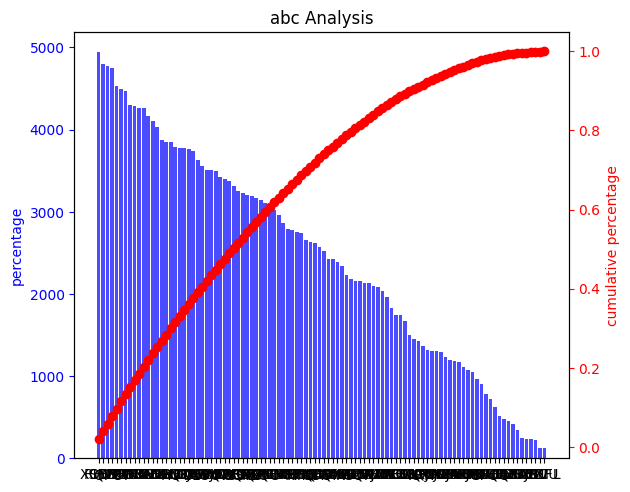

In [7]:
# パレート図を作成するには、まず各クラス（'A', 'B', 'C'）のデータポイント数を数え、それを元にパーセンテージを計算します。
# 次に、累積パーセンテージを計算して、それを元にパレート図を描画します。以下はその具体例です。

import matplotlib.pyplot as plt

# パレート図を描画
fig, ax1 = plt.subplots()

ax1.bar(data_sorted['product names'], data_sorted['sales'], color='b', alpha=0.7, align='center')
ax1.set_ylabel('percentage', color='b')
ax1.tick_params('y', colors='b') #y軸メモリの色

ax2 = ax1.twinx()
ax2.plot(data_sorted['product names'], data_sorted['cum_sales_rate'], color='r', marker='o')
ax2.set_ylabel('cumulative percentage', color='r')
ax2.tick_params('y', colors='r') #y軸メモリの色

fig.tight_layout()
plt.title('abc Analysis')
plt.show()